In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


In [ ]:
# Load the OHLC data from Excel file
df = pd.read_excel('/content/GOLD_DATA_EXCEL.xlsx')

# Convert the 'Date' column to datetime type
df['Date'] = pd.to_datetime(df['Date'])

# Set the 'Date' column as the DataFrame index
df.set_index('Date', inplace=True)

# Sort the DataFrame by date in ascending order
df.sort_index(ascending=True, inplace=True)

# Optionally, you can resample the data to a different frequency if needed
# For example, to resample to monthly frequency, you can use:
# df = df.resample('M').mean()



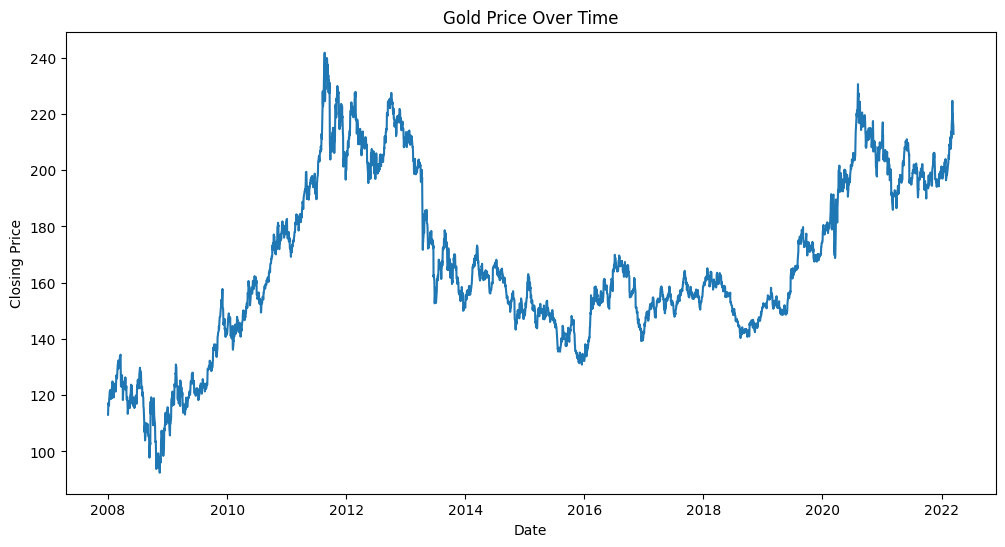

In [ ]:
# Plot the closing prices over time
plt.figure(figsize=(12, 6))
plt.plot(df['Close'])
plt.title('Gold Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

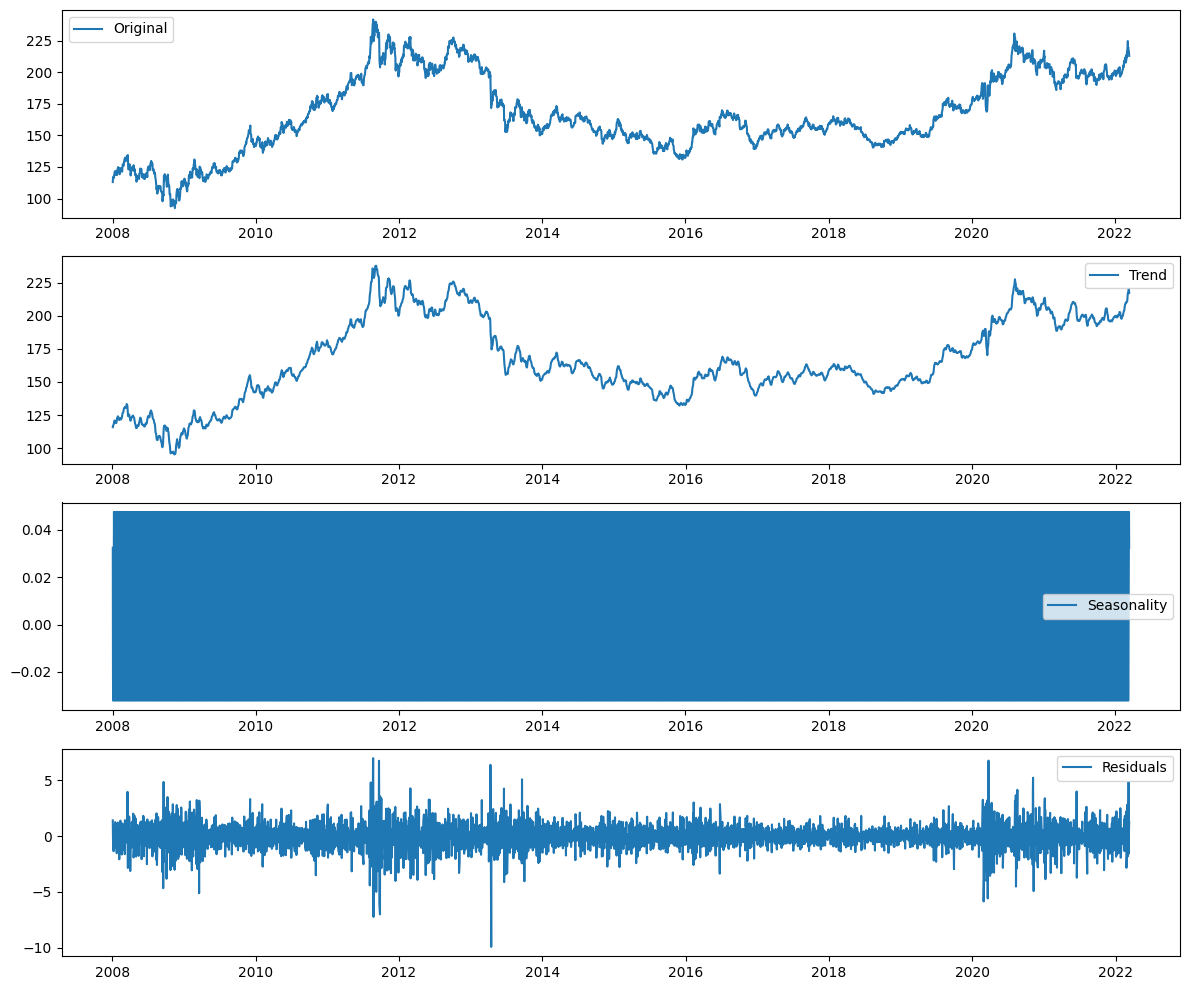

In [ ]:
# Perform decomposition to visualize trend, seasonality, and residuals
decomposition = seasonal_decompose(df['Close'], model='additive')
fig, axes = plt.subplots(4, 1, figsize=(12, 10))
axes[0].plot(df['Close'], label='Original')
axes[0].legend(loc='best')
axes[1].plot(decomposition.trend, label='Trend')
axes[1].legend(loc='best')
axes[2].plot(decomposition.seasonal, label='Seasonality')
axes[2].legend(loc='best')
axes[3].plot(decomposition.resid, label='Residuals')
axes[3].legend(loc='best')
plt.tight_layout()
plt.show()


In [ ]:
# Define a function to perform the augmented Dickey-Fuller test for stationarity
def adf_test(timeseries):
    result = adfuller(timeseries)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))

# Perform the augmented Dickey-Fuller test on the closing prices
adf_test(df['Close'])

# Apply differencing to make the series stationary
df['Differenced_Close'] = df['Close'].diff()
df.dropna(inplace=True)

# Perform the augmented Dickey-Fuller test on the differenced series
adf_test(df['Differenced_Close'])

ADF Statistic: -1.712440304463823
p-value: 0.42471452459675235
Critical Values:
	1%: -3.432119084560324
	5%: -2.8623216835793537
	10%: -2.5671861014853827
ADF Statistic: -26.581069732856815
p-value: 0.0
Critical Values:
	1%: -3.432119084560324
	5%: -2.8623216835793537
	10%: -2.5671861014853827


In [ ]:
# Calculate the daily price changes
df['Price_Change'] = df['Close'].diff()

# Remove the first row (NaN) since it has no price change
df = df[1:]

# Split the data into train and test sets
train_size = int(len(df) * 0.8)
train_data, test_data = df[:train_size], df[train_size:]

# Prepare the feature and target variables
X_train, y_train = train_data.drop(columns=['Price_Change']), train_data['Price_Change']
X_test, y_test = test_data.drop(columns=['Price_Change']), test_data['Price_Change']

# Create and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Make predictions on the training and test sets
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Calculate R-squared scores for the training and test sets
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print('R-squared score (Train):', r2_train)
print('R-squared score (Test):', r2_test)


R-squared score (Train): 0.9995657769388212
R-squared score (Test): 0.9980889828162678


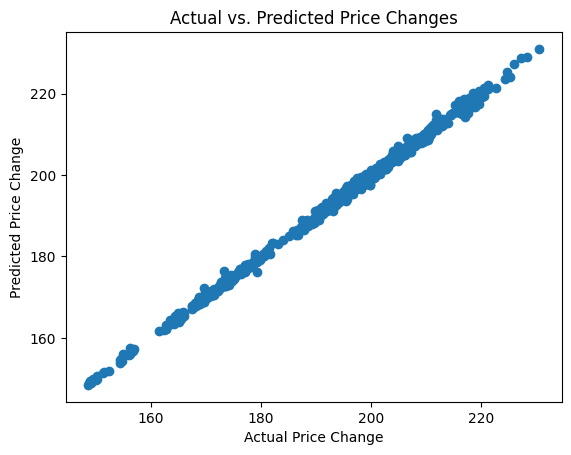

In [ ]:
# Plot the actual vs. predicted price changes
plt.scatter(y_test, y_pred_test)
plt.title('Actual vs. Predicted Price Changes')
plt.xlabel('Actual Price Change')
plt.ylabel('Predicted Price Change')
plt.show()

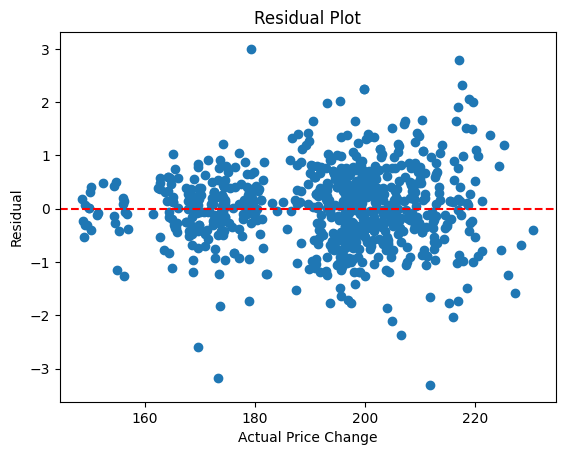

In [ ]:
# Plot the residuals
residuals = y_test - y_pred_test
plt.scatter(y_test, residuals)
plt.title('Residual Plot')
plt.xlabel('Actual Price Change')
plt.ylabel('Residual')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()